In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector

### we have our data in mysql databse so lets connect our notebook with our database

In [2]:
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "password123",
                             database = "ecommerce")

cur = db.cursor()

## we have 6 tables in our database lets have a look at them 

# 1) customers

In [4]:
query = """ select * from customers """ 

cur.execute(query)
data =  cur.fetchall()

columns = [col[0] for col in cur.description]

customers= pd.DataFrame(data , columns = columns)
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers.shape

(198882, 5)

In [6]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198882 entries, 0 to 198881
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_id               198882 non-null  object
 1   customer_unique_id        198882 non-null  object
 2   customer_zip_code_prefix  198882 non-null  int64 
 3   customer_city             198882 non-null  object
 4   customer_state            198882 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.6+ MB


# 2) orders

In [8]:
query = """ select * from orders """ 

cur.execute(query)
data =  cur.fetchall()

columns = [col[0] for col in cur.description]

orders = pd.DataFrame(data , columns = columns)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
orders.shape

(198882, 8)

In [10]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 320
order_delivered_carrier_date     3566
order_delivered_customer_date    5930
order_estimated_delivery_date       0
dtype: int64

### Deal with null values

In [11]:
### there are 3 columns with null values which means as following : 
### order_approved_at is null (means order does not approved)
### order_deliver_carrier_date is null (means order did'nt shipped)
### order_delivered_csutomer_date is null *order not delivered to customer)

## lets fill those null values


In [12]:
[orders["order_status"].unique()]

[array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
        'canceled', 'created', 'approved'], dtype=object)]

In [13]:
orders["order_approved_at"] = orders.order_approved_at.fillna("order not approved")
orders["order_delivered_customer_date"] = orders.order_approved_at.fillna("order not delivered")
orders["order_delivered_carrier_date"] = orders.order_approved_at.fillna("order not shipped")

In [14]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

# order_items

In [15]:
query = """ select * from order_items """ 

cur.execute(query)
data =  cur.fetchall()

columns = [col[0] for col in cur.description]

order_items = pd.DataFrame(data , columns = columns)
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
order_items.shape

(112650, 7)

In [17]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [18]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


# Sellers

In [19]:
query = """ select * from sellers """ 

cur.execute(query)
data =  cur.fetchall()

columns = [col[0] for col in cur.description]

sellers = pd.DataFrame(data , columns = columns)
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
sellers.shape

(6190, 4)

In [21]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

# Payments

In [22]:
query = """ select * from payments """ 

cur.execute(query)
data =  cur.fetchall()

columns = [col[0] for col in cur.description]

payments = pd.DataFrame(data , columns = columns)
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [23]:
payments.shape

(103886, 5)

In [24]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100381
std,0.706584,2.687051,217.494076
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.100000


# Products

In [26]:
query = """ select * from products """ 

cur.execute(query)
data =  cur.fetchall()

columns = [col[0] for col in cur.description]

products = pd.DataFrame(data , columns = columns)
products.head()

,product_id,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
products.shape

(65902, 9)

In [28]:
products.isnull().sum()

product_id                       0
product_category              1220
product_name_length           1220
product_description_length    1220
product_photos_qty            1220
product_weight_g                 4
product_length_cm                4
product_height_cm                4
product_width_cm                 4
dtype: int64

## Deal with null values

#### I am mentioning product category as"others" where ctaegory is null , and mention "not defined" on the dimensions value where they are null

In [29]:
products["product_category"] = products["product_category"].fillna("others")

In [30]:
products = products.fillna("not defined")

In [31]:
products.isnull().sum()

product_id                    0
product_category              0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Now from these tables we have to retrieve insights which are beneficial for us to get valueable outcomes for our business ,these insights are retrieved below...

# 1) get Yearly sales value

In [10]:
query = """ select year(o.order_purchase_timestamp) as 'year' , Round(sum(p.payment_value),2) from 
            orders o join payments p on 
            p.order_id = o.order_id
            group by year """

cur.execute(query)
data = cur.fetchall()

yearly_sales = pd.DataFrame(data , columns = ["Year" , "Total_Sales"])
yearly_sales

,Year,Total_Sales
0,2017,14499493.46
1,2018,17399526.10
2,2016,118724.68


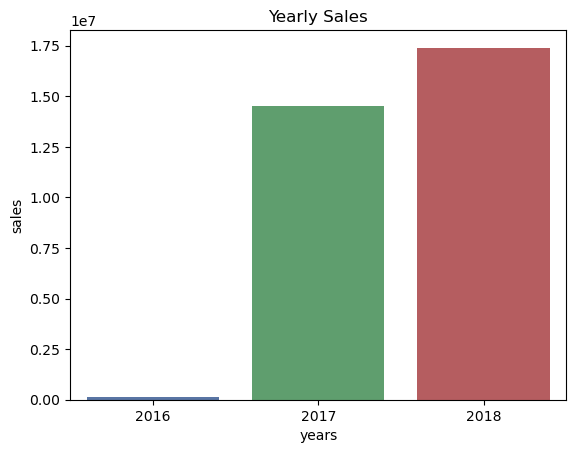

In [11]:
sns.barplot(x = "Year" , y = "Total_Sales" , data = yearly_sales , palette = "deep6")

plt.title('Yearly Sales')
plt.xlabel('years')
plt.ylabel('sales')
plt.show()

# 2) get monthly trend on order count

In [52]:
query = """select month(o.order_purchase_timestamp) as month_number,  monthname(o.order_purchase_timestamp) as months ,  count(o.order_id ) orders  
from orders o
where year(o.order_purchase_timestamp) != 2016
group by  months , month_number
order by month_number """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns = ["month_number" ,"month_name" , "Number of orders"]  )
df

,month_number,month_name,Number of orders
0,1,January,16138
1,2,February,17016
2,3,March,19786
3,4,April,18686
4,5,May,21146
5,6,June,18824
6,7,July,20636
7,8,August,21686
8,9,September,8602
9,10,October,9270


### Year 2016 is ignored as we did not have date for all the months in 2016

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


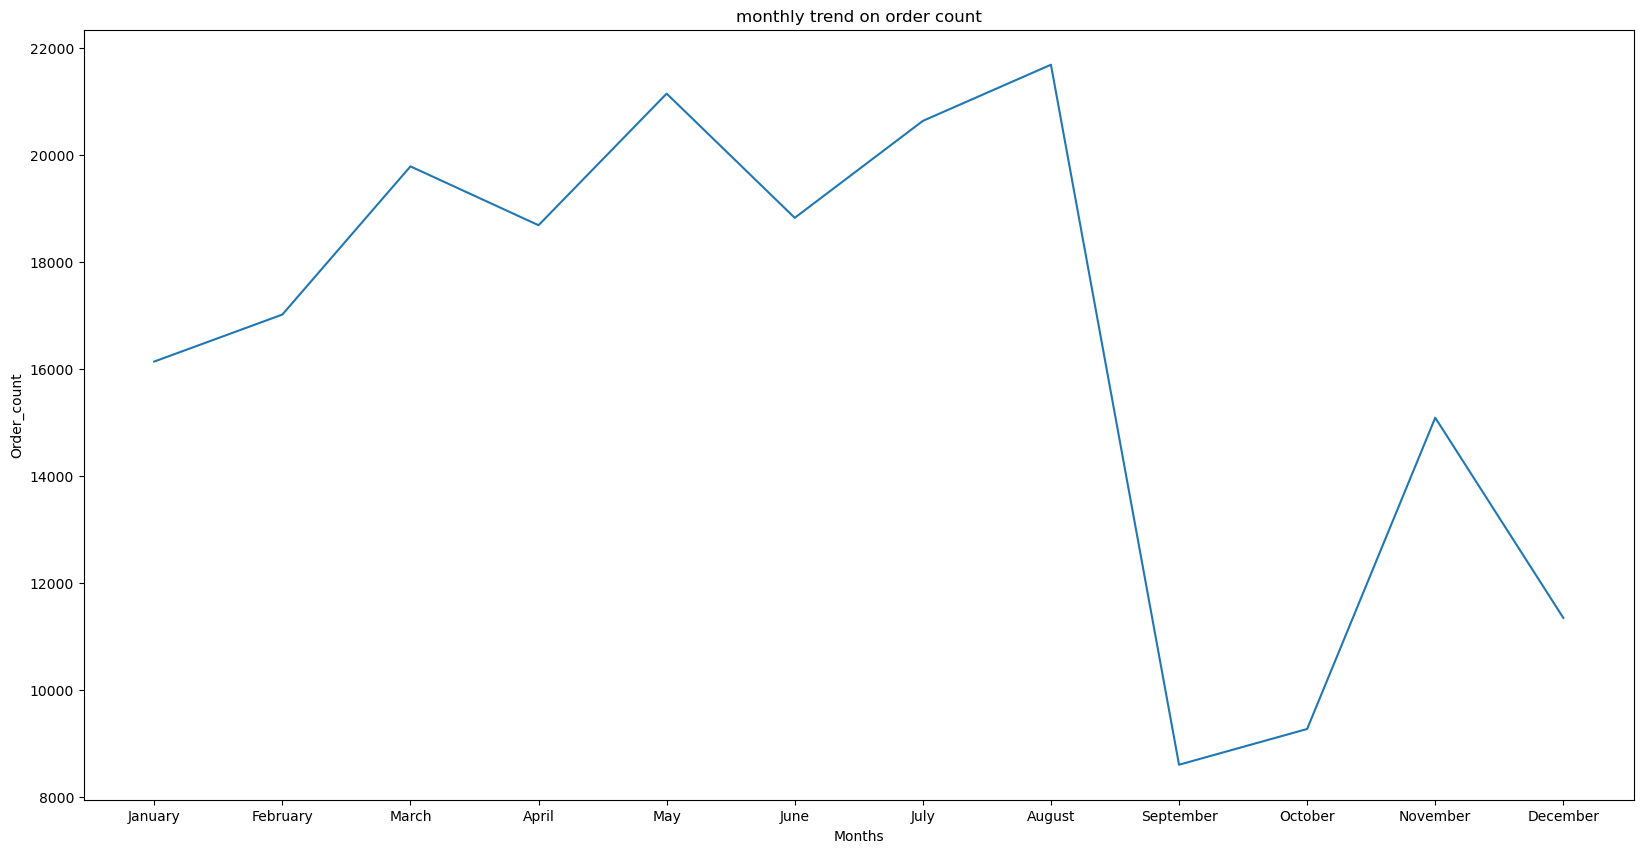

In [53]:
plt.figure(figsize = (20,10))
sns.lineplot(x="month_name" , y = "Number of orders" ,  data = df )
plt.title("monthly trend on order count")
plt.xlabel("Months")
plt.ylabel("Order_count")
plt.show()

## There can be many reason like , less sale or offers around september ,Stockouts, website outages, app crashes , Seasonal Demand Shift (August might  include back-to-school or festive sales) etc. 


## But as we did not have enough data to analyse these reasons we cannot find the exact reason.

# 3) Product_Category wise Sales

In [12]:
query = """  select products.product_category  category  , round(sum(payments.payment_value),2)  sales
from products join order_items 
on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category order by sales desc """ 

cur.execute(query)

data = cur.fetchall()

category_wise_sales = pd.DataFrame( data , columns = ["Product_category" , "Sales"])
category_wise_sales

,Product_category,Sales
0,bed table bath,3425107.34
1,HEALTH BEAUTY,3314746.24
2,computer accessories,3170660.89
3,Furniture Decoration,2860352.78
4,Watches present,2858433.36
...,...,...
69,PC Gamer,4348.86
70,House Comfort 2,3421.08
71,cds music dvds,2398.86
72,Fashion Children's Clothing,1571.34


## Thus Following are the Top Selling Product Categories 

In [13]:
top_selling_categories = category_wise_sales.head()
top_selling_categories

,Product_category,Sales
0,bed table bath,3425107.34
1,HEALTH BEAUTY,3314746.24
2,computer accessories,3170660.89
3,Furniture Decoration,2860352.78
4,Watches present,2858433.36


# 4) Top 5 Sellers on the basis of payment value

In [14]:
query =  """ select ot.seller_id , Round(sum(p.payment_value),2) sales from order_items ot
             join payments p on 
             ot.order_id = p.order_id 
             group by ot.seller_id  
             order by sales desc 
             limit 5 """

cur.execute(query)
data = cur.fetchall()

Top_5_Sellers = pd.DataFrame(data , columns = ["Seller_id","Sales_Value"])
Top_5_Sellers

,Seller_id,Sales_Value
0,7c67e1448b00f6e969d365cea6b010ab,507166.91
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04
2,4a3ca9315b744ce9f8e9374361493884,301245.27
3,1f50f920176fa81dab994f9023523100,290253.42
4,53243585a1d6dc2643021fd1853d8905,284903.08


# 5) Top_5_Customers on the basis of Payment_value

In [15]:
query = """ select o.customer_id , Round(sum(p.payment_value),2) Purchase_Amount from orders o 
             join order_items ot on ot.order_id = o.order_id 
             join payments p on p.order_id = ot.order_id 
             group by o.customer_id
             order by Purchase_Amount desc
             limit 5 """

cur.execute(query)
data = cur.fetchall()

Top_5_Customers = pd.DataFrame(data , columns = ["Customers" , "Purchase_Amount"])
Top_5_Customers

,Customers,Purchase_Amount
0,1617b1357756262bfa56ab541c47bc16,218625.28
1,bd5d39761aa56689a265d95d8d32b8be,90512.00
2,be1b70680b9f9694d8c70f41fa3dc92b,88096.00
3,05455dfa7cd02f13d132aa7a6a9729c6,72978.48
4,1ff773612ab8934db89fd5afa8afe506,60372.00


# 6) let's check how many orders are delivered late (after estimated delivery date)

In [16]:
query = """ with cte1 as (select count(order_id) o1  from 
            orders where order_delivered_customer_date > order_estimated_delivery_date) ,
            
            cte2 as(select count(order_id) o from orders) 
            
            select cte1.o1 , cte2.o from cte1,cte2 """

cur.execute(query)

data = cur.fetchall()

late_deliveries = pd.DataFrame(data , columns = ["Late_Delivery" , "Total_Delivery"])
late_deliveries

,Late_Delivery,Total_Delivery
0,15654,198882


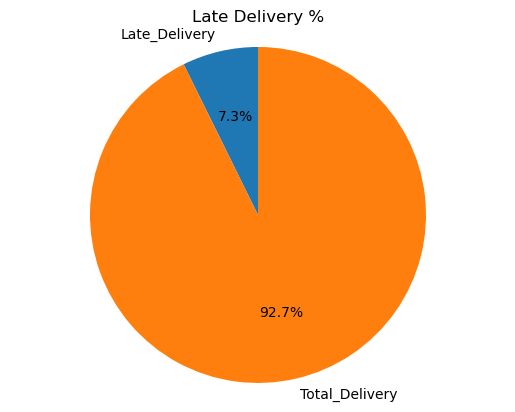

In [17]:
values = late_deliveries.iloc[0][["Late_Delivery" , "Total_Delivery"]]
labels =  ["Late_Delivery" , "Total_Delivery"]

plt.pie(values , labels = labels , autopct = '%1.1f%%' , startangle = 90 )
plt.title("Late Delivery %")
plt.axis('equal')
plt.show()


# 7) Check out for the city wise % rate  for late deliveries 

In [18]:
query = """ with cte1 as (select c.customer_city , count(ot.order_id) late from  orders ot join 
            customers c on c.customer_id = ot.customer_id 
            where ot.order_delivered_customer_date > ot.order_estimated_delivery_date 
            group by c.customer_city) ,
            cte2 as(
            select c.customer_city , count(ot.order_id) total from  orders ot join 
            customers c on c.customer_id = ot.customer_id 
            group by c.customer_city)
            
            select cte1.customer_city , cte1.late , cte2.total , Round((cte1.late/cte2.total)*100,2) as late_delivery_per  from cte1 join cte2 on 
            cte1.customer_city = cte2.customer_city
            where cte2.total >= 100 
            order by late_delivery_per desc """ 

cur.execute(query)
data = cur.fetchall()

late_delivery_cities = pd.DataFrame( data , columns = ["City" , "Late Delivery Count" , "Total Delivery Count" , "Percentage_rate_of_late_deliveries"])
late_delivery_cities 



,City,Late Delivery Count,Total Delivery Count,Percentage_rate_of_late_deliveries
0,armacao dos buzios,52,116,44.83
1,santarem,60,176,34.09
2,maracanau,40,140,28.57
3,maceio,280,988,28.34
4,itaperuna,48,188,25.53
...,...,...,...,...
422,mogi mirim,4,304,1.32
423,assis,4,336,1.19
424,vinhedo,4,380,1.05
425,itatiba,4,388,1.03


In [19]:
top_late_delivery_cities = late_delivery_cities.head(10)

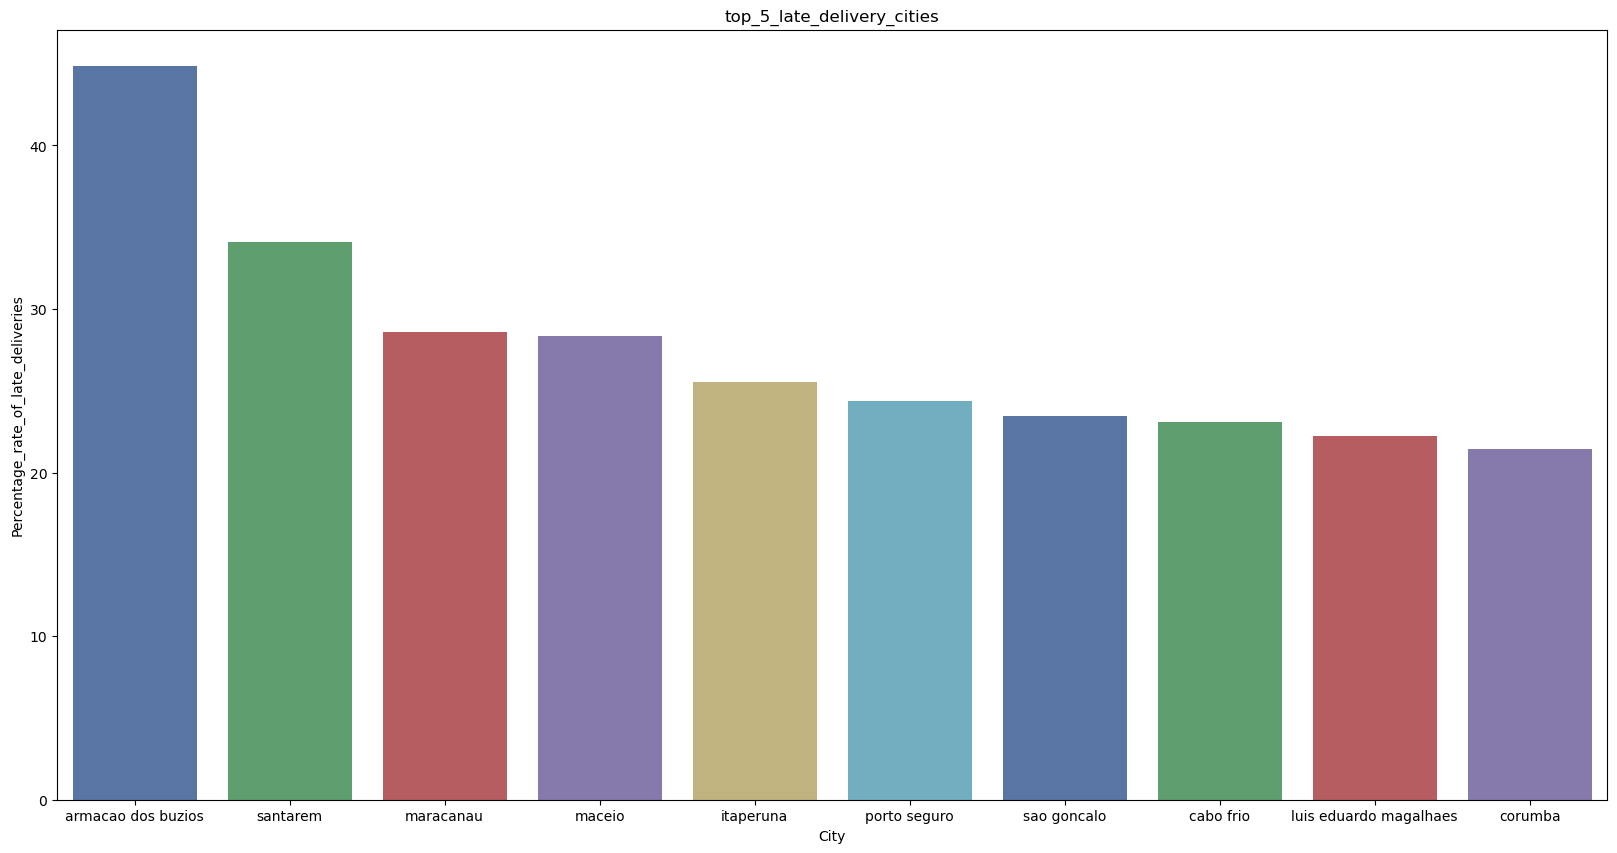

In [20]:
plt.figure(figsize = (20,10))
sns.barplot(x = "City" , y = "Percentage_rate_of_late_deliveries" , data = top_late_delivery_cities  , palette = "deep6")
plt.title("top_5_late_delivery_cities")
plt.show()

### we have checked for the cities which have more then 100 orders for relevent check , and got some cities listed in the table where  more then 25% deliveries are late

# 8) Average number of days between delivery date and  order_approved_date

In [33]:
query = """ select  Round(avg(datediff(order_delivered_customer_date , order_approved_at))) as days from 
            orders """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns = ["Average_days_for_delivery"] )
df

,Average_days_for_delivery
0,12


## on an average 12 Days are taken to deliver order after approval date

# 9) what are diffrent Payment methods and which is the most prominent one

In [36]:
query = """ select payment_type, Round(sum(payment_value),2) as total_pymnt from 
            payments 
            group by payment_type 
            order by total_pymnt desc """

cur.execute(query)
data = cur.fetchall()

Payment_Types = pd.DataFrame(data , columns = ["payment_type","total_payment"] )
Payment_Types

,payment_type,total_payment
0,credit_card,12542084.19
1,UPI,2869361.27
2,voucher,379436.87
3,debit_card,217989.79
4,not_defined,0.00


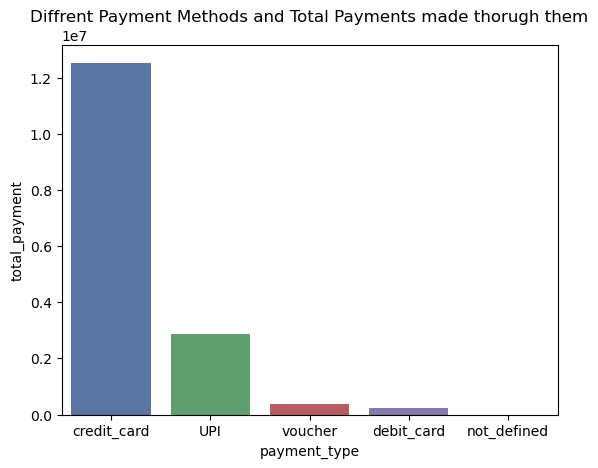

In [40]:
sns.barplot(x = "payment_type" , y = "total_payment" , data = Payment_Types , palette = "deep6")
plt.title("Diffrent Payment Methods and Total Payments made thorugh them")
plt.show()

## Most of the Payments are made through credit cards

# 10) Percentage of Payments made in installments 

In [42]:
query = """ select Round((count(*)/(select count(*) from payments))*100 ,2)   from payments 
             where 	payment_installments > 1 """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns = ["Percentage of Payments made in installments"] )
df

,Percentage of Payments made in installments
0,49.42


### 49.42 % of Pyaments are made in installments

# 11) City wise Count of customers 

In [47]:
query = """ select customer_city , count(distinct customer_id) cnt from customers 
            group by customer_city
            order by cnt desc"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns = ["City" , "Number of Customers"] )
df

,City,Number of Customers
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,vitoria do jari,1
4115,vitorino,1
4116,vitorinos,1
4117,wagner,1


### Top 5 cities according to customer count 

In [48]:
ddf = df.head(5)

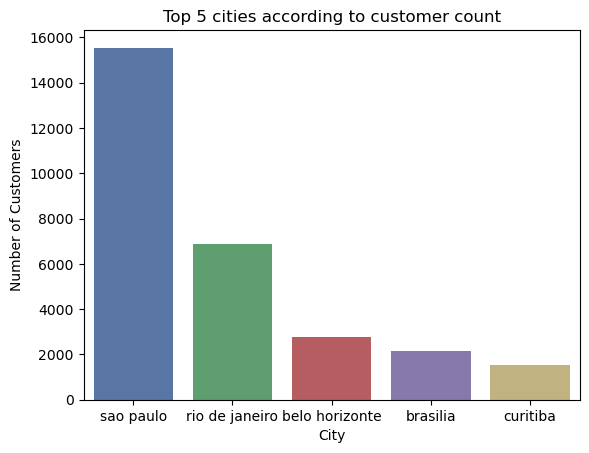

In [49]:
sns.barplot(x = "City" , y = "Number of Customers" , data = ddf , palette = "deep6")
plt.title("Top 5 cities according to customer count")
plt.show()

### We can find more insights as per the requirements 

# Thank You